In [1]:
from loader.data_loader import REFIT_Loader

In [2]:
refit = REFIT_Loader()

Followings are the general configuration of your experiment..
{'DATA_FOLDER': 'data/refit/', 'DATA_TYPE': '.csv', 'README_FILE': 'data/refit/REFIT_Readme.txt', 'REFIT_HOUSES': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21]}

Loading specified buildings: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21]
Parsing the readme file specified: data/refit/REFIT_Readme.txt


## Fetch available appliances for a selected house

In [3]:
refit.get_appliance_names(house_number=2)

Fetching appliances for house = 2


['unix',
 'aggregate',
 'fridge-freezer',
 'washingmachine',
 'dishwasher',
 'television',
 'microwave',
 'toaster',
 'hi-fi',
 'kettle',
 'ovenextractorfan']

## Load data for selected appliance (selected houses)

In [4]:
%%time
washing_machine = refit.get_appliance_data('washingmachine', houses=[2])

Loading data for appliance WASHINGMACHINE

Fetching WASHINGMACHINE data for House 2
Wall time: 8.21 s


In [5]:
import pandas as pd
import utils.time_utils as t

def resample(house_data, sampling_period, fill_value, window_limit):
    """

    """
    try:
        sampling_period = sampling_period
        fill_value = fill_value
        window_limit= int(window_limit*60)
        ls = {}
        
        for house_number in house_data.keys():
            print(f"Resampling for house number: ", house_number)
            target_appliance = house_data[house_number].columns[-1]

            appliance_data = house_data[house_number]
            appliance_data.index = t.convert_object2timestamps(appliance_data.index)

            appliance_data = appliance_data.dropna() #### do we need to dropna???
    #         appliance_data = appliance_data.resample('1s').mean().dropna()
            appliance_data = appliance_data.resample('1s').asfreq()
            appliance_data.fillna(method='ffill', axis=0, inplace=True, limit=window_limit)
            print((sum(appliance_data[target_appliance].isna())/len(appliance_data))*100)
            appliance_data.fillna(axis=0, inplace=True, value=fill_value)
            print((sum(appliance_data[target_appliance].isna())/len(appliance_data))*100)
            appliance_data = appliance_data.resample(sampling_period).median()
            ls.update({house_number: appliance_data})
        return ls
            
            
    except Exception as e:
        print("Error occured in resample method of REFIT_Loader due to ", e)


In [ ]:
print(type(kettle))

In [6]:
df = resample(kettle, sampling_period='8s', fill_value = 0.0, window_limit=2)

Resampling for house number:  2
24.523678127590408
0.0


## Sample Cases

<AxesSubplot:xlabel='time'>

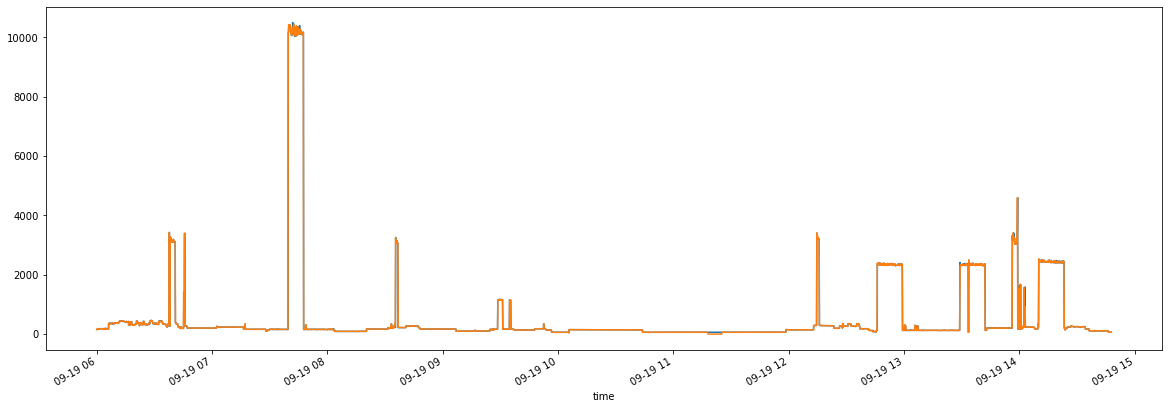

In [24]:
kettle[2]['aggregate'].loc['2013-09-19 06:00': '2013-09-19 14:47'].plot(figsize=(20,7))
df[2]['aggregate'].loc['2013-09-19 06:00': '2013-09-19 14:47'].plot(figsize=(20,7))

<AxesSubplot:xlabel='time'>

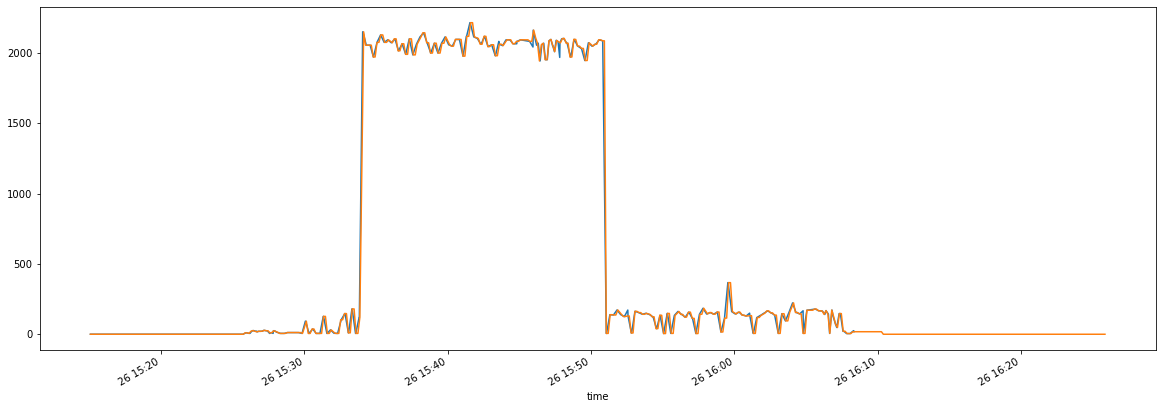

In [31]:
kettle[2][kettle[2].columns[-1]].loc['2013-12-26 15:15': '2013-12-26 16:25'].plot(figsize=(20,7))
df[2][df[2].columns[-1]].loc['2013-12-26 15:15': '2013-12-26 16:25'].plot(figsize=(20,7))

<AxesSubplot:xlabel='time'>

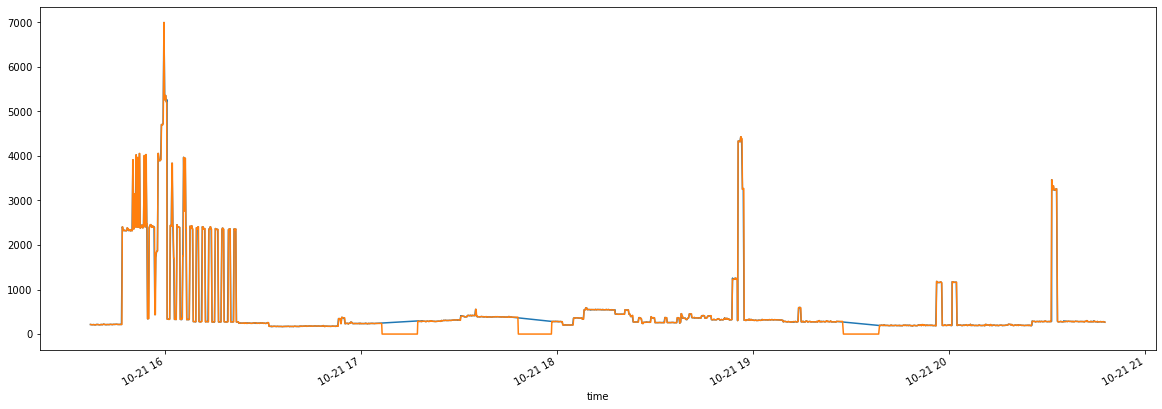

In [13]:
kettle[2]['aggregate'].loc['2013-10-21 15:37': '2013-10-21 20:47'].plot(figsize=(20,7))
df[2]['aggregate'].loc['2013-10-21 15:37': '2013-10-21 20:47'].plot(figsize=(20,7))

<AxesSubplot:xlabel='time'>

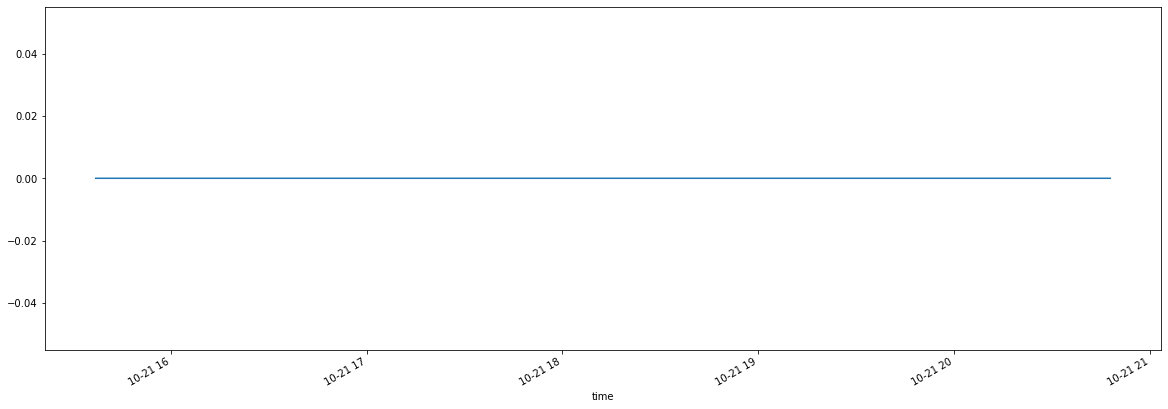

In [15]:
kettle[2][kettle[2].columns[-1]].loc['2013-10-21 15:37': '2013-10-21 20:47'].plot(figsize=(20,7))
# df[2][df[2].columns[-1]].loc['2013-10-21 15:37': '2013-10-21 20:47'].plot(figsize=(20,7))